In [1]:
POPULATION = 130000
num_days = 300
num_recovered = 0
prob_contact = 0.2
prob_recovery = 1/14

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def simulate_spread(infected, recovered, num_days, prob_contact):
    susceptible = POPULATION - infected - recovered
    days = np.array(range(num_days))
    sir_data = np.zeros((num_days, 3))
    for index in range(num_days):
        new_recoveries = infected * prob_recovery
        new_infections = prob_contact * (infected/POPULATION) * susceptible
        recovered = recovered + new_recoveries
        if recovered > POPULATION: 
            recovered = POPULATION
        infected = infected + new_infections - new_recoveries
        susceptible = POPULATION - recovered - infected
        sir_data[index, :] = [susceptible, infected, recovered]
    return days,sir_data


In [4]:
days_1, sir_data_1 = simulate_spread(4, 0, 30, 0.4)
num_infected = sir_data_1[-1, 1]
num_recovered = sir_data_1[-1, 2]
days_2, sir_data_2 = simulate_spread (num_infected, num_recovered, 300, 0.15)

In [5]:
days = np.array(range(330))
sir_data = np.concatenate((sir_data_1, sir_data_2))

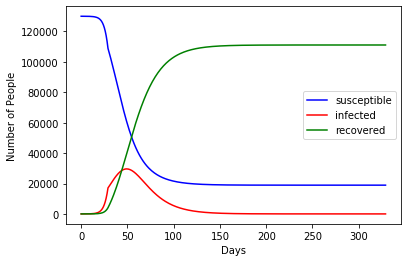

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(days, sir_data[:,0], 'b', label = 'susceptible')
ax.plot(days, sir_data[:,1], 'r', label = 'infected')
ax.plot(days, sir_data[:,2], 'g', label = 'recovered')
ax.set_xlabel("Days")
ax.set_ylabel("Number of People")
legend = ax.legend()
plt.show()


In [7]:
critical_data = np.zeros(num_days)
critical_data = sir_data[:,1] * 0.05

In [8]:
np.max(critical_data)

1480.3202982957396